### Taxa Churn e Detecção de Fraudes
<p>- Extraindo taxa de rotatividade de clientes usando a métrica Churn Rate.</p>

<p>- Procurando por padrões suspeitos que possam indicar atividades fraudulentas.</p>

<p>Dados adqueridos no Keggle:</p>
<a><p>https://www.kaggle.com/datasets/syviaw/bankchurners</p><a>
    
###### Dados quase totalmente já limpos

In [1]:
import pandas as pd

dados = pd.read_csv("dados/BankChurners.csv")
dados.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [2]:
dados = dados.drop(columns= ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
dados.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [3]:
missing = dados.isna().sum()
missing

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Text(0, 0.5, 'Relacionamente')

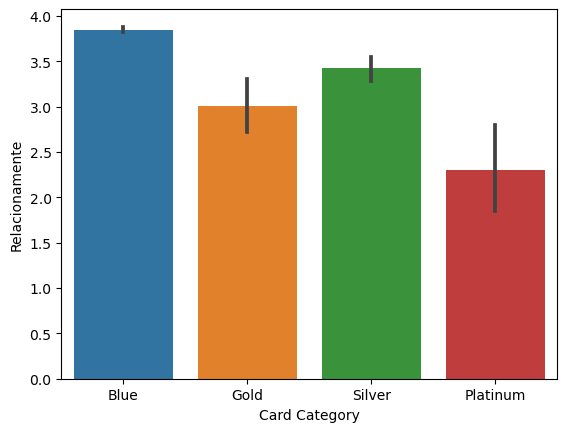

In [4]:
import seaborn as sns

ax = sns.barplot(x="Card_Category", y="Total_Relationship_Count", data=dados)
ax.set_xlabel("Card Category")
ax.set_ylabel("Relacionamente")

C:\Users\henri\anaconda3\anaconda2nd\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


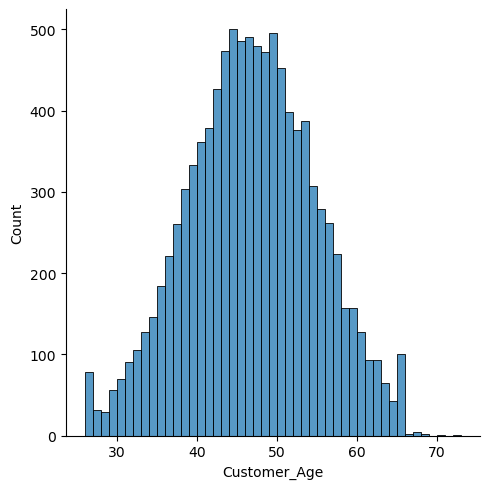

In [5]:
sns.displot(data=dados, x='Customer_Age')

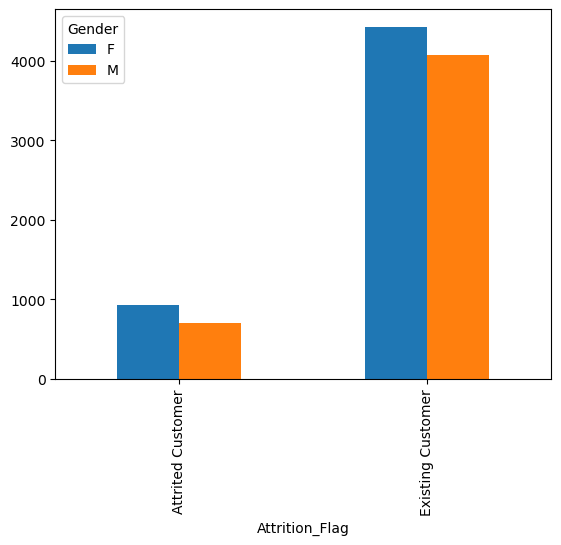

In [6]:
contador_genero = dados.groupby(['Attrition_Flag', 'Gender']).size().unstack()

ax = contador_genero.plot(kind='bar')

Text(0.5, 1.0, 'Distribuição do Nível de Educação por Churn status')

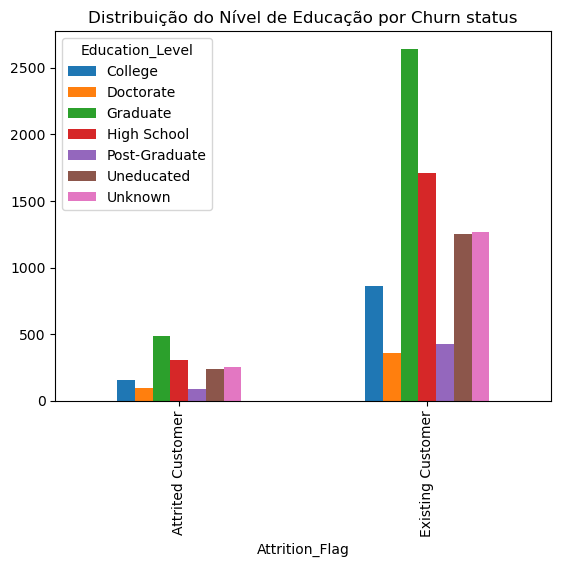

In [7]:
churn_educação = dados.groupby(['Attrition_Flag', 'Education_Level']).size().unstack()

ax = churn_educação.plot(kind='bar')
ax.set_title('Distribuição do Nível de Educação por Churn status')

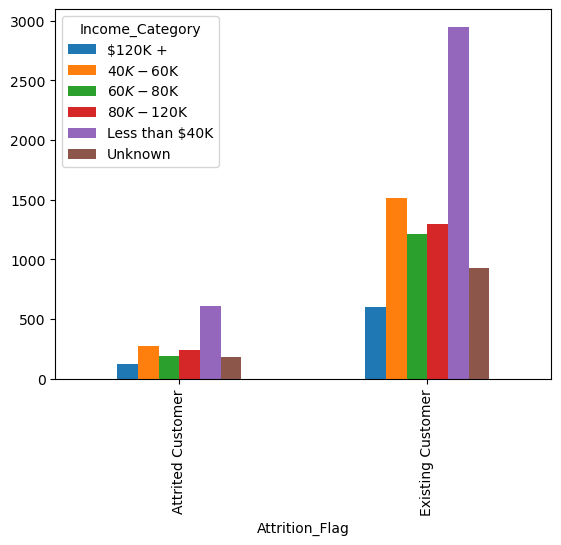

In [8]:
churn_renda_client = dados.groupby(['Attrition_Flag', 'Income_Category']).size().unstack()

ax = churn_renda_client.plot(kind='bar')

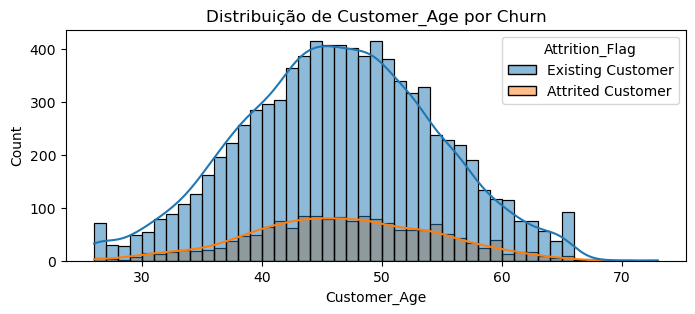

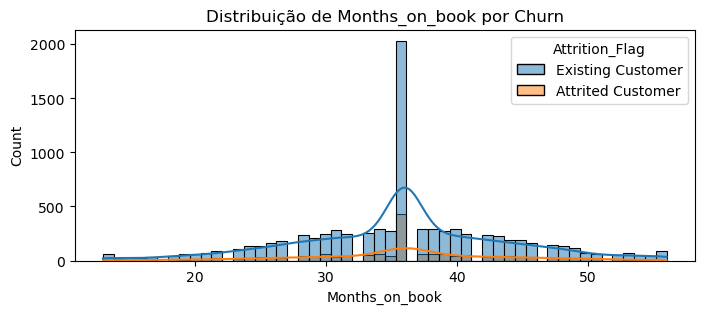

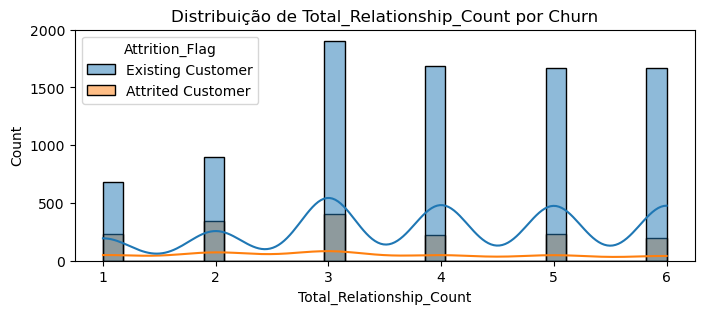

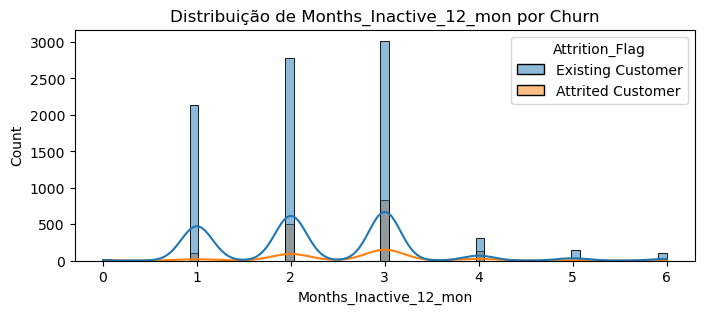

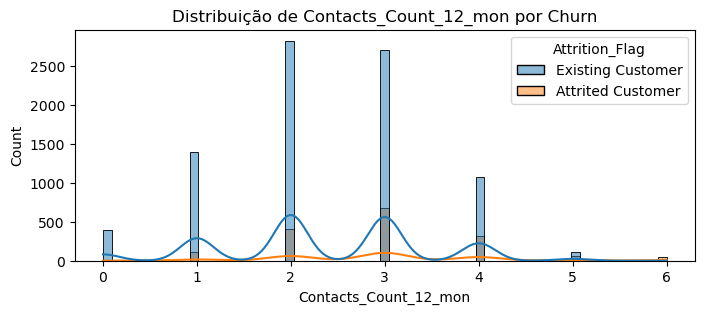

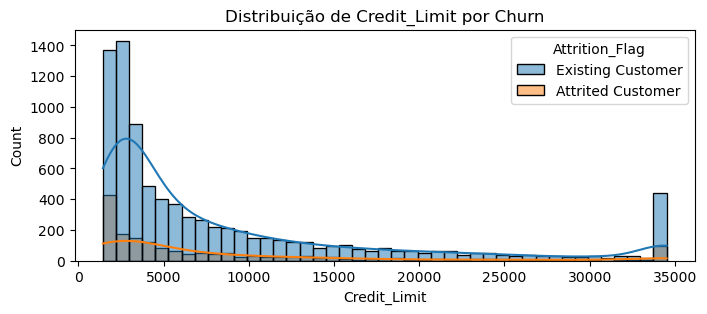

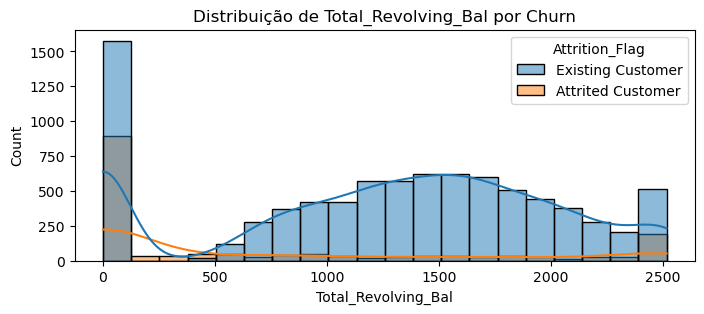

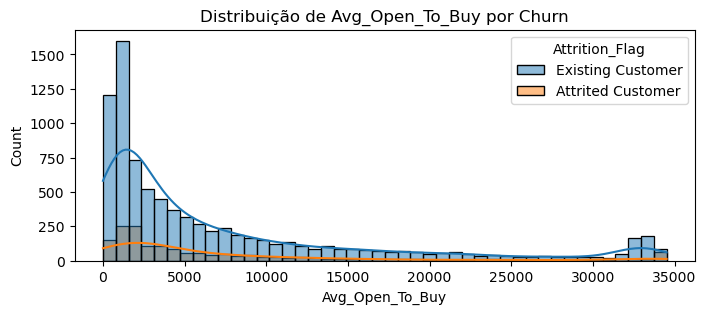

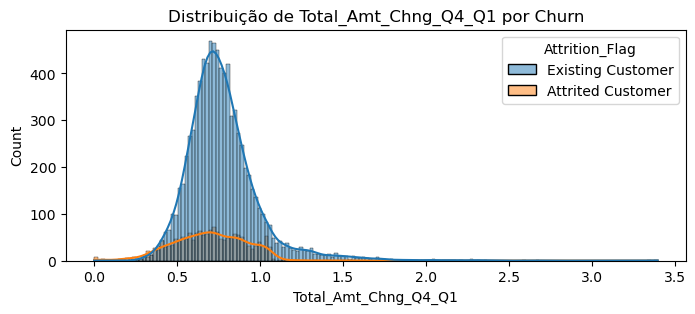

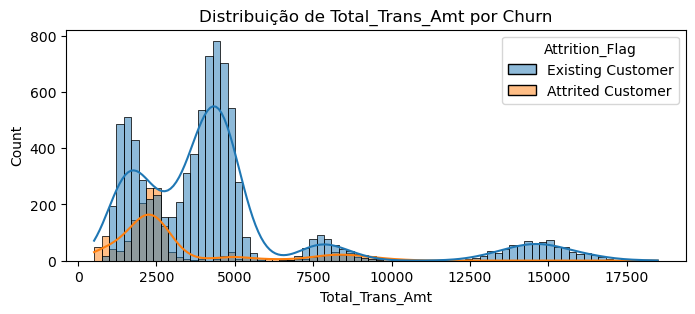

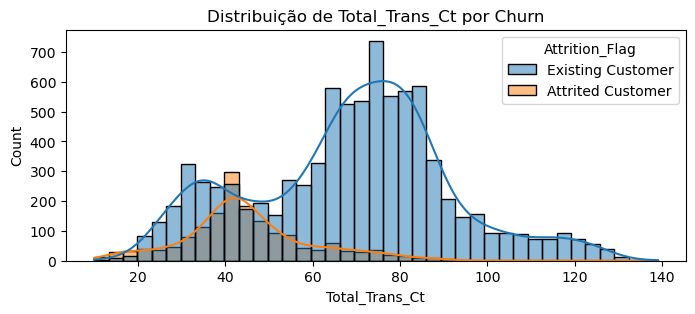

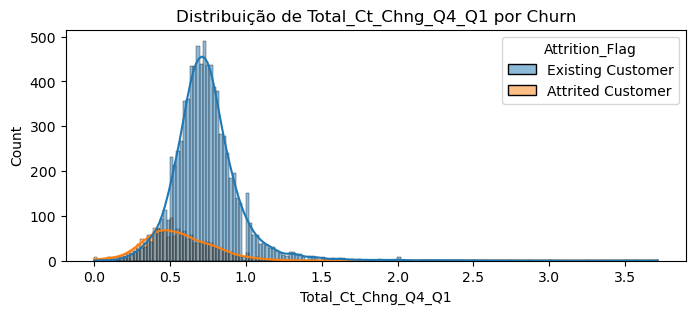

In [9]:
import matplotlib.pyplot as plt

numeric_features = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

for feature in numeric_features:
    plt.figure(figsize=(8, 3))
    sns.histplot(data=dados, x=feature, hue='Attrition_Flag', kde=True)
    plt.title(f'Distribuição de {feature} por Churn')
    plt.show()

## Taxa Churn

In [10]:
contagem_churn = dados['Attrition_Flag'].value_counts()

taxa_churn = contagem_churn.get('Attrited Customer', 0) / contagem_churn.sum() * 100

contagem_churn, taxa_churn

(Attrition_Flag
 Existing Customer    8500
 Attrited Customer    1627
 Name: count, dtype: int64,
 16.065962279055988)

## Detecção de Fraudes 

#### Transformando dados

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe= ohe.fit_transform(dados[["Attrition_Flag","Gender", "Education_Level", "Marital_Status",
                                      "Income_Category", "Card_Category"]]).toarray()
dados2 = dados.drop(columns=["Attrition_Flag","Gender", "Education_Level", "Marital_Status",
                             "Income_Category", "Card_Category"], axis=1)

dados_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, 
                                                columns=ohe.get_feature_names_out(["Attrition_Flag","Gender", "Education_Level", "Marital_Status",
                                                                                   "Income_Category", "Card_Category"]))], axis=1)
dados_dummies.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
3                 2517            796.0                 1.405  ...   
4                    0           4716.0                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 39 columns]

In [12]:
dados_dummies.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'C

In [13]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados_dummies.values)
values

array([[2.57701906e-03, 1.71801271e-04, 2.23341652e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.37880848e-03, 4.46817192e-04, 3.93199129e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.82760061e-03, 5.78094154e-04, 6.93712984e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.43136767e-03, 7.79856288e-05, 2.80748264e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.66985889e-03, 1.77990592e-04, 3.20383066e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.53053678e-03, 1.17699385e-04, 1.47124231e-03, ...,
        0.00000000e+00, 0.00000000e+00, 5.88496926e-05]])

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

#### Validação: Escolha do numero de Clusters

In [15]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.4711449998319783


In [16]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

0.7934674741808094


In [17]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

15751.68196196126


In [18]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [19]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.45510198735342106 0.9961957235386456 14646.231047856847


In [20]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.47056232207242715 0.7948619819859734 15751.785080018664


In [21]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.4106648661091738 0.7693830663637675 16435.66609196468


In [22]:
dados['cluster'] = labels

In [23]:
dados.head(2)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   

   Avg_Utilization_Ratio  cluster  
0                  0.061        0  
1                  0.105        0  

[2 rows x 21 columns]

In [24]:
#max = min(len(centroids[0]), len(dados.columns.values))
#for i in range(max):
#    print(dados.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

SEED = 1224
np.random.seed(SEED)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])

In [26]:
embedding_pca = pca_pipeline.fit_transform(dados_dummies)
projection = pd.DataFrame(columns=['x', 'y'], data=embedding_pca)

In [27]:
projection.head()

x         y
0  1.508367 -0.510810
1 -1.342995 -3.325267
2  0.959012 -1.868603
3 -2.489693 -2.463531
4  0.857632 -2.060563

In [28]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
kmeans_pca = kmeans.fit(projection)

dados['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

In [29]:
projection.head()

x         y  cluster_pca
0  1.508367 -0.510810            2
1 -1.342995 -3.325267            0
2  0.959012 -1.868603            2
3 -2.489693 -2.463531            0
4  0.857632 -2.060563            2

In [30]:
import plotly.express as px

fig = px.scatter(projection, x='x', y='y', color='cluster_pca')
fig.show()

### Procutando por anormalidade

In [31]:
description = dados.groupby('cluster')[['Months_on_book', 'Months_Inactive_12_mon']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

         Months_on_book  Months_Inactive_12_mon  n_clients
cluster                                                   
0             36.166963                2.339000       3941
1             36.105960                2.324503       1057
2             35.365677                2.298335       1381
3             35.625810                2.354744       1697
4             36.007801                2.371526       2051


#### Avg_Open_To_Buy: Média do valor disponível para gastar do cliente

In [32]:
dados.groupby('cluster')['Avg_Open_To_Buy'].describe()

count          mean           std     min     25%      50%      75%  \
cluster                                                                         
0        3941.0  15169.415757  10052.766137  1132.3  6992.0  11921.0  22297.0   
1        1057.0   1321.847588    863.734876     3.0   670.0   1105.0   1790.0   
2        1381.0   1954.146126   1508.483564   129.3   947.3   1438.3   2243.0   
3        1697.0    930.338362    552.782662    10.0   558.0    842.0   1144.0   
4        2051.0   4964.727791   4021.714911   855.3  2379.5   3595.0   5773.0   

             max  
cluster           
0        34516.0  
1         4714.0  
2         8836.0  
3         4370.0  
4        23981.0

#### Total_Trans_Ct: Número total de transações do cliente

In [33]:
dados.groupby('cluster')['Total_Trans_Ct'].describe()

count       mean        std   min   25%   50%   75%    max
cluster                                                             
0        3941.0  57.283177  22.991512  10.0  38.0  57.0  73.0  139.0
1        1057.0  43.084201  14.495477  12.0  33.0  40.0  51.0  102.0
2        1381.0  85.239681  18.085098  37.0  73.0  82.0  95.0  131.0
3        1697.0  72.249263  13.110371  15.0  66.0  74.0  82.0  103.0
4        2051.0  70.798635  22.798543  20.0  53.0  71.0  85.0  138.0

#### Total_Revolving_Bal: Saldo total rotativo do cliente

In [34]:
dados.groupby('cluster')['Total_Revolving_Bal'].describe()

count         mean         std    min     25%     50%     75%  \
cluster                                                                   
0        3941.0  1094.466125  813.525469    0.0     0.0  1200.0  1720.0   
1        1057.0  1926.049196  464.112771  537.0  1580.0  1933.0  2396.0   
2        1381.0   733.965243  694.153929    0.0     0.0   777.0  1169.0   
3        1697.0  1671.468474  449.867016  455.0  1343.0  1643.0  1980.0   
4        2051.0   768.700634  776.714668    0.0     0.0   721.0  1423.0   

            max  
cluster          
0        2517.0  
1        2517.0  
2        2517.0  
3        2517.0  
4        2517.0

#### Total_Trans_Amt: Soma de todos os valores de transações realizadas por um cliente durante um período específico

In [35]:
dados.groupby('cluster')['Total_Trans_Amt'].describe()

count         mean          std     min     25%     50%     75%  \
cluster                                                                     
0        3941.0  3544.385943  2893.747497   510.0  1694.0  2659.0  4174.0   
1        1057.0  1999.794702   761.874888   596.0  1470.0  1839.0  2349.0   
2        1381.0  7370.387400  4420.264277  2383.0  4426.0  4880.0  9442.0   
3        1697.0  4257.132587  1032.448491  1554.0  3875.0  4359.0  4714.0   
4        2051.0  5419.363725  3898.533556   850.0  2724.5  4262.0  5257.0   

             max  
cluster           
0        17350.0  
1         5103.0  
2        18484.0  
3         9495.0  
4        17628.0